<a href="https://colab.research.google.com/github/iamsaugatbista/Professional_class/blob/main/ARIMA_SARIMAX_Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saugatbista","key":"d9da6968d4b48a027e25d47a75f35079"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



In [7]:
!pip install kaggle



In [8]:
!kaggle competitions download -c store-sales-time-series-forecasting


  0% 0.00/21.4M [00:00<?, ?B/s]
100% 21.4M/21.4M [00:00<00:00, 1.19GB/s]


In [9]:
!unzip store-sales-time-series-forecasting.zip



Archive:  store-sales-time-series-forecasting.zip
  inflating: holidays_events.csv     
  inflating: oil.csv                 
  inflating: sample_submission.csv   
  inflating: stores.csv              
  inflating: test.csv                
  inflating: train.csv               
  inflating: transactions.csv        


In [10]:
import pandas as pd

df = pd.read_csv("train.csv")
df.head()


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [11]:
df.columns


Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

In [12]:
df1 = df[(df['store_nbr'] == 1) & (df['family'] == "GROCERY I")]
len(df1)


1684

In [13]:
df1['date'] = pd.to_datetime(df1['date'])
df1 = df1.sort_values('date')
df1 = df1.set_index('date')

sales = df1['sales']
sales.head()


/tmp/ipython-input-4266952021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date'] = pd.to_datetime(df1['date'])


,sales
date,
2013-01-01,0.0
2013-01-02,2652.0
2013-01-03,2121.0
2013-01-04,2056.0
2013-01-05,2216.0


In [14]:
sales.index.is_monotonic_increasing


True

In [15]:
sales = sales.asfreq('D')
sales.isna().sum()


np.int64(4)

In [18]:
sales = sales.ffill()
sales.isna().sum()




np.int64(0)

In [19]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(sales)

print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -4.139220298948379
p-value: 0.0008336304142674237


In [20]:
!pip install pmdarima statsmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 9.4 MB/s eta 0:00:00


In [22]:
from pmdarima import auto_arima

auto_model = auto_arima(
    sales,
    seasonal=True,
    m=7,
    trace=True,
    stepwise=True,
    suppress_warnings=True
)

auto_model.summary()



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=15.13 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=27814.776, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=26641.721, Time=1.58 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=2.00 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=27812.780, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=27481.261, Time=0.12 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=26355.836, Time=4.68 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=inf, Time=14.09 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=inf, Time=5.75 sec
 ARIMA(0,1,0)(2,0,0)[7] intercept   : AIC=26562.163, Time=2.89 sec
 ARIMA(2,1,0)(2,0,0)[7] intercept   : AIC=26282.732, Time=6.48 sec
 ARIMA(2,1,0)(1,0,0)[7] intercept   : AIC=26577.858, Time=2.32 sec
 ARIMA(2,1,0)(2,0,1)[7] intercept   : AIC=inf, Time=18.08 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=inf, Time=8.35 sec
 ARIMA(3,1,0)(2,0,0)[7] intercept   : AIC=26229.863,

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1688
Model:             SARIMAX(5, 1, 0)x(2, 0, 0, 7)   Log Likelihood              -13087.416
Date:                           Tue, 03 Feb 2026   AIC                          26190.833
Time:                                   06:02:34   BIC                          26234.278
Sample:                               01-01-2013   HQIC                         26206.923
                                    - 08-15-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4883      0.014    -34.456      0.000      -0.516      -0.460
ar.L2         -0.3452      0.019    -18.563      0.000      -0.382      -0.309
ar.L3         -0.2697      0.022    -12.067      0.000      -0.313      -0.226
ar.L4         -0.1708      0.023     -7.548      0.000      -0.215      -0.126
ar.L5         -0.0955      0.019     -5.118      0.000      -0.132      -0.059
ar.S.L7        0.3406      0.014     23.554      0.000       0.312       0.369
ar.S.L14       0.4279      0.015     27.919      0.000       0.398       0.458
sigma2      3.193e+05   4423.513     72.172      0.000    3.11e+05    3.28e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              9979.43
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               2.53   Skew:                             0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Corrected order based on ADF
model = SARIMAX(
    sales,
    order=(5, 0, 0),           # non-seasonal ARIMA(p,d,q) with d=0
    seasonal_order=(2, 0, 0, 7),  # seasonal ARIMA(P,D,Q,m)
    enforce_stationarity=True,
    enforce_invertibility=True
)

model_fit = model.fit(disp=False)
print(model_fit.summary())



/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:                             sales   No. Observations:                 1688
Model:             SARIMAX(5, 0, 0)x(2, 0, 0, 7)   Log Likelihood              -13040.298
Date:                           Tue, 03 Feb 2026   AIC                          26096.597
Time:                                   06:05:13   BIC                          26140.047
Sample:                               01-01-2013   HQIC                         26112.688
                                    - 08-15-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4176      0.013     32.091      0.000       0.392       0.443
ar.L2          0.0722      0.026      2.806

In [24]:
# forcasting
#Split Train/Test
train_size = int(len(sales) * 0.8)
train, test = sales[:train_size], sales[train_size:]



In [25]:
#Retrain on Train Set
model = SARIMAX(
    train,
    order=(5,0,0),
    seasonal_order=(2,0,0,7),
    enforce_stationarity=True,
    enforce_invertibility=True
)
model_fit = model.fit(disp=False)


In [26]:
#Forecast Test Period
forecast = model_fit.forecast(steps=len(test))


In [27]:
#Evaluate Accuracy
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 1731.8653116372075
RMSE: 1947.6406882979993


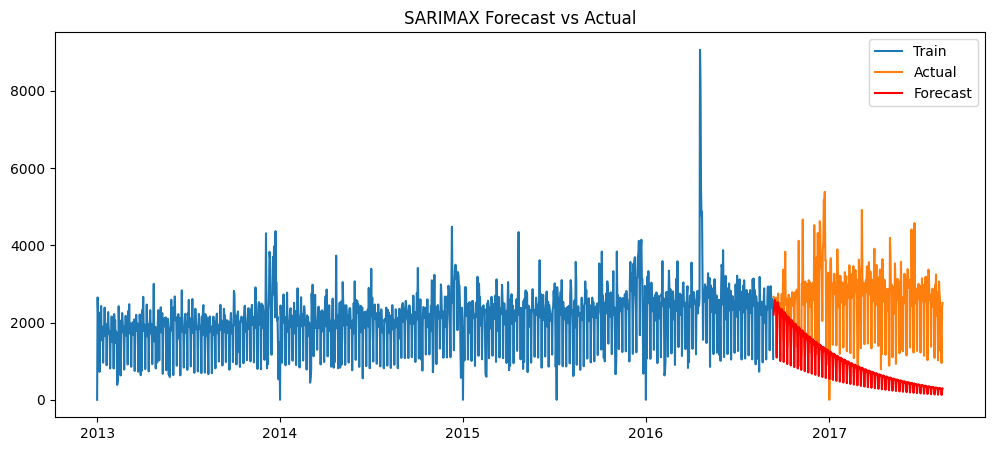

In [28]:
#Plot Forecast vs Actual
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title("SARIMAX Forecast vs Actual")
plt.legend()
plt.show()
